# **Séance 5 : Loi de Pareto et extrapolations**
### **Professeur** : Christophe Ancey
#### **Assistants** : 
- Yanan Chen
- Sofi Farazande
- Clemente Gotelli
---

## Ajustements et extrapolations

Nous allons comparer ici la pluie centennale à Davos obtenue par extrapolation grâce aux quatre méthodes vues en cours, à savoir :

- **Méthodes à seuils:** Méthode du renouvellement et loi généralisée de Pareto
- **Méthodes par blocs :** Méthodes des moments et du maximum de vraisemblance

In [1]:
%load_ext jupyter_black

## **1. Méthode du renouvellement**

On rappelle que la méthode du renouvellement cherche à représenter les évènements extrêmes grâce à une loi de Poisson (comptabilisant le nombre d'évènements pour une période donnée) et une loi exponentielle (traduisant la distribution de ces évènements dans le temps). 

Pour une période de retour $T$ très grande, on obtient le quantile en fonction de la période de retour grâce à la formule suivante:

\begin{equation*}
C=s+\frac{\mbox{ln}\lambda}{\mu}+\frac{1}{\mu}\mbox{ln}T+O(T^{-1})
\label{eq:1} \tag{1}
\end{equation*}

Avec les paramètres :
- $\lambda=n_s/n_a$
- $\mu=1/(\tilde{C}-s)$
1. Tracer l'histogramme des précipitations à Davos couvrant $n_a$ années et déterminer à priori une valeur $s$ du seuil possible. Ne retenir que les $n_s$ précipitations dépassant le seuil par la suite. `[sns.histplot]`

**Solution:**  

>On s'interesse ici à la statistique des valeurs extrêmes. Nous allons voir différentes techniques qui permettent de déduire une distribution, c'est à dire une loi de probabilité, qui décrit ces dernières.   
Pour rappel, la théorie des valeurs extrêmes permet de dire si la distribution des maxima d'un échantillon de valeur (p. ex. de pluies journalières) appartient à la familles des lois de valeur extrême de Gumbel, Fréchet ou Weibull (et ce quelle que soit la distribution de la population originale). Il s'agit ensuite de caler une loi pour décire cette distribution des valeurs extrêmes et de l'extrapoler pour déduire les quantiles extrêmes (valeurs, p. ex. de pluie journalière, associées à un temps de retour, ici, important).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("data/pluies_davos.csv", delimiter=" ")

In [4]:
df.head()

,id,year,month,day,p1,p2,rain
0,28,1987,1,1,0,0,4.8
1,28,1987,1,2,0,0,6.9
2,28,1987,1,3,0,0,5.2
3,28,1987,1,4,0,0,0.0
4,28,1987,1,5,0,0,5.7


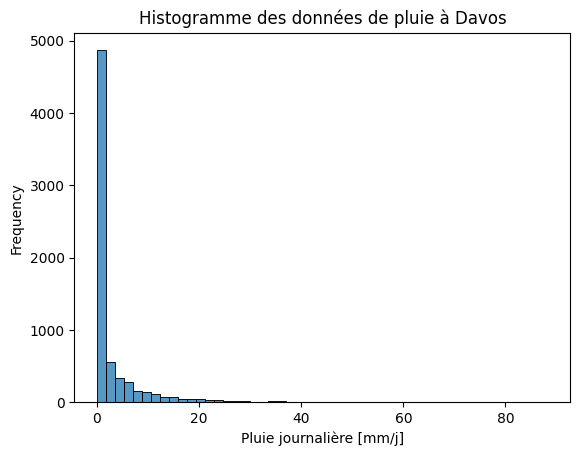

In [5]:
ax = sns.histplot(df["rain"], bins=50, kde=False)
plt.title("Histogramme des données de pluie à Davos")
plt.xlabel("Pluie journalière [mm/j]")
plt.ylabel("Frequency")
plt.show()

Or with the plot function available with Pandas.

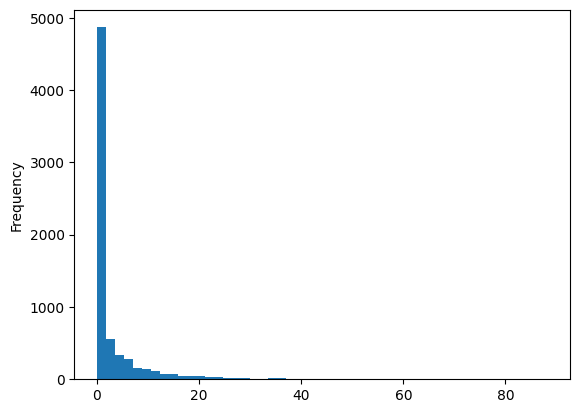

In [6]:
df["rain"].plot(kind="hist", bins=50)
plt.show()

We choose the "seuil" and we get all the rows with rain over that threshold.

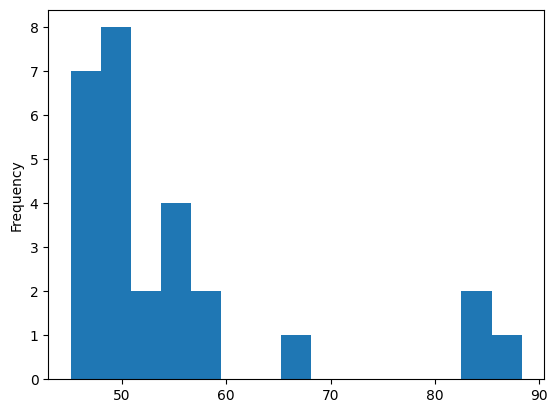

In [7]:
seuil = 45
over_seuil = df[df["rain"] > seuil]["rain"]
over_seuil.plot(kind="hist", bins=15)
plt.show()

2. Classer les valeurs de l'échantillon par ordre croissant et calculer $\tilde{C}$, sa moyenne empirique. `[sort_values(), mean()]`

**Solution:**  

In [8]:
Ps = over_seuil.sort_values()
Ms = Ps.mean()

3. A chaque valeur de l'échantillon de rang $i$, on affecte la période de retour :

\begin{equation*}
T_i=\frac{n_a}{n_s}\frac{n_s+1}{i}
\label{eq:2} \tag{2}
\end{equation*}

> Make $i$ go from 1 to the length of the filtered values over the threshold. `[count(), nunique()]`

**Solution:**  

In [9]:
Ns = Ps.count()
Na = df["year"].nunique()
I = np.arange(1, Ns + 1, 1)
T = (
    Na / Ns * (Ns + 1) / (Ns + 1 - I)
)  # période de retour empirique (mais dépendante du seuil)

4. Calculer les paramètres $\lambda$ et $\mu$, puis tracer dans un diagramme $(T,C)$: La variation du quantile $C$ en fonction de la période de retour $T$, grâce à la l'équation 1. Comparer avec les valeurs empiriques. `Make a graph of Pluie vs Période de retour T [années]`

**Solution:**  

In [10]:
lda = Ns / Na
mu = 1 / (Ms - seuil)
C = seuil + np.log(lda) / mu + 1 / mu * np.log(I)

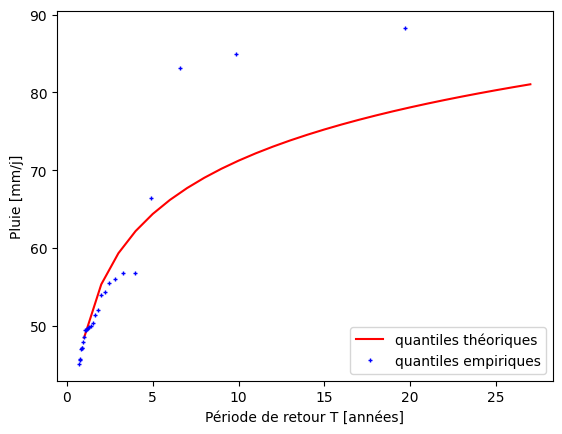

In [11]:
plt.plot(I, C, "r")
plt.plot(T, Ps, "b+", ms=3)
plt.xlabel("Période de retour T [années]")
plt.ylabel("Pluie [mm/j]")
plt.legend(("quantiles théoriques", "quantiles empiriques"))
plt.show()

5. Quel est la valeur de la pluie centennale ? $C_{100}=$ 

**Solution:**  

In [12]:
C100_ren = (
    seuil + np.log(lda) / mu + 1 / mu * np.log(100)
)  # pluie centennale théorique [mm/j]
C100_ren

93.99659328286123

6. Changer le seuil tel que $s_2>s$ puis $s_3<s$, et tracer les lois obtenues sur la même fenêtre. Quelle influence cela a t-il sur l'extrapolation? Comment choisir un « bon~» seuil selon vous? 

**Solution:**  

In [13]:
# Second threshold
seuil2 = 60
over_seuil2 = df[df["rain"] > seuil2]["rain"]
Ps2 = over_seuil2.sort_values()
Ms2 = Ps2.mean()
Ns2 = Ps2.count()
Na2 = df["year"].nunique()
I2 = np.arange(1, Ns2 + 1, 1)
T2 = (
    Na2 / Ns2 * (Ns2 + 1) / (Ns2 + 1 - I2)
)  # période de retour empirique (mais dépendante du seuil)

lda2 = Ns2 / Na2
mu2 = 1 / (Ms2 - seuil2)
C2 = seuil2 + np.log(lda2) / mu2 + 1 / mu2 * np.log(I)

# Third threshold
seuil3 = 30
over_seuil3 = df[df["rain"] > seuil3]["rain"]
Ps3 = over_seuil3.sort_values()
Ms3 = Ps3.mean()
Ns3 = Ps3.count()
Na3 = df["year"].nunique()
I3 = np.arange(1, Ns3 + 1, 1)
T3 = (
    Na3 / Ns3 * (Ns3 + 1) / (Ns3 + 1 - I3)
)  # période de retour empirique (mais dépendante du seuil)

lda3 = Ns3 / Na3
mu3 = 1 / (Ms3 - seuil3)
C3 = seuil3 + np.log(lda3) / mu3 + 1 / mu3 * np.log(I)

We plot all together.

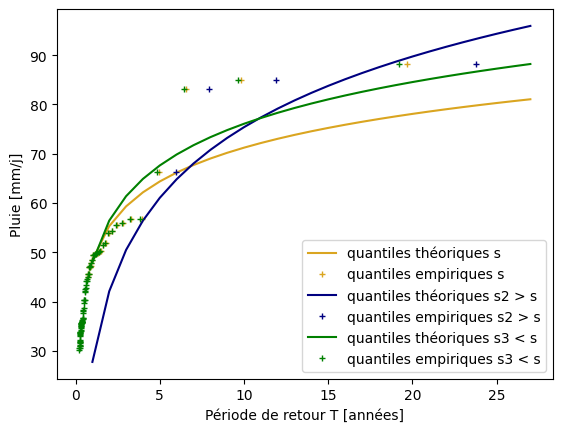

In [14]:
plt.plot(I, C, color="goldenrod", label="quantiles théoriques s")
plt.plot(T, Ps, "+", markeredgecolor="goldenrod", ms=5, label="quantiles empiriques s")
plt.plot(I, C2, color="navy", label="quantiles théoriques s2 > s")
plt.plot(
    T2, Ps2, "+", markeredgecolor="navy", ms=5, label="quantiles empiriques s2 > s"
)
plt.plot(I, C3, "g", label="quantiles théoriques s3 < s")
plt.plot(T3, Ps3, "g+", ms=5, label="quantiles empiriques s3 < s")

plt.xlabel("Période de retour T [années]")
plt.ylabel("Pluie [mm/j]")
plt.legend()
plt.show()

> Le choix de la valeur seuil est assez arbitraire. Elle doit être suffisamment grande pour définir des valeurs dîte "extrêmes", mais également suffisamment petite afin d'avoir un nombre de valeur suffisant pour que les résultats aient du sens. De manière générale, on cherche à ce que la loi cale au mieux les données pour les valeurs importantes, puisque c'est ces dernières qui nous interessent.

---

## 2. Loi de Pareto
>_*Vilfredo Pareto, né le 15 juillet 1848 à Paris et mort le 19 août 1923 à Céligny (Suisse), est un sociologue et économiste italien. Il demeure célèbre pour son observation des 20 \% de la population qui possèdent 80 \% des richesses en Italie, généralisée plus tard en distribution de Pareto. Cette observation a été étendue à d'autres domaines sous le terme de « principe de Pareto ».  Il définit la notion d'optimum paretien comme une situation d'ensemble dans laquelle un individu ne peut améliorer sa situation sans détériorer celle d'un autre individu.*_

La loi de Pareto s'exprime ainsi :

$$
 G(x)=1-{\left(1+\frac{\tilde{\xi}x}{\tilde{\sigma}}\right)}^{-1/\tilde{\xi}} \tag{3}
$$

On cherche à déterminer ses paramètres. On peut obtenir que pour tout seuil $s>s_0$, l'équation suivante est vérifiée :

$$
E[X-s|X>s] = \frac{\tilde{\sigma_s}}{1-\tilde{\xi}} = \frac{\tilde{\sigma_{s_0}} +
\tilde{\xi}(s-s_0)}{1-\tilde{\xi}} =  \frac{\tilde{\sigma_{s_0}}-\tilde{\xi}\cdot s_0}{1-\tilde{\xi}}+ \frac{\tilde{\xi}}{1-\tilde{\xi}}\cdot s \tag{4}
$$

$\tilde{\xi}/(1-\tilde{\xi})$ est donc la pente et $(\tilde{\sigma_{s_0}} - \tilde{\xi}s_0)/(1-\tilde{\xi})$ l'ordonnée à l'origine de la fonction $f(s)=E[X-s|X>s]$ 

1. Tracer $E(X-s|X>s)$ en fonction de $s$ et déterminer a priori sur quel domaine le paramètre $\tilde{\xi}$ pourra être ajusté. *(calculer la moyenne de la distance des valeurs qui dépassent le seuil par rapport à ce même seuil)*. `[mean()]`

> Calcul de la moyenne (i.e. de l'espérence $E$) de $X-s$ sachant que $X>s$ $\rightarrow$ $(E(X-s|X>s)$) pour différentes valeurs de seuil s, X étant la variable aléatoire donnant les pluies journalières.

**Solution:**  

In [17]:
df = pd.read_csv("data/pluies_davos.csv", delimiter=" ")

E = np.array([])
x = np.arange(1, 81)
for seuil in x:
    E = np.append(E, (df[df["rain"] > seuil]["rain"] - seuil).mean())

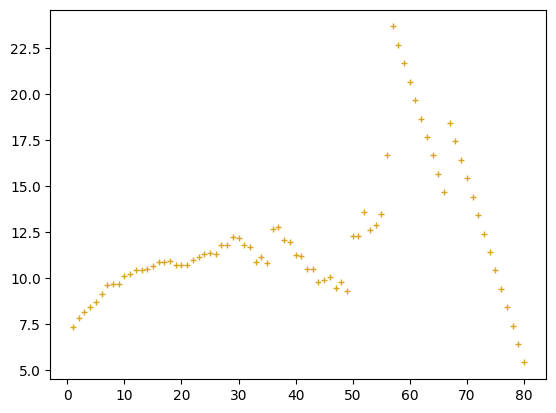

In [18]:
plt.plot(x, E, "+", markeredgecolor="goldenrod", ms=5, label="quantiles empiriques s")
plt.show()

> On observe graphiquement 3 domaines de valeur de seuil pour la fonction $E(X-s|X>s)$ [1,29] faiblement croissante, [30,58] fortement croissante et [59, 80] décroissante $x_i$ et $\sigma_0$ pourront être estimés pour le domaine [30,58], pour un seuil plus petit les valeurs ne sont pas extrêmes et la loi de Pareto n'est pas adaptée et pour un seuil plus grand il n'y a plus assez de valeurs dans l'échantillon.


2. Pour un domaine fixé, calculer les paramètres de la loi de Pareto qui approchent le mieux cette distribution (vous pouvez utiliser la commande `np.polyfit`). Tracer la droite ajustée sur le même graphique que $f(s)$. A quelle type de loi de valeurs extrêmes peut-on comparer la loi de Pareto ?

> Ajustement des paramètres de la loi de Pareto par une régression linéaire sur la fonction $E(X-s|X>s)$.

**Solution:**  

In [19]:
# régression linéaire sur le domaine entier (i.e. pour toutes les valeurs de seuil)
x = np.arange(1, 81)
p1 = np.polyfit(x, E, 1)

ang_coeff = p1[0]
intercept = p1[1]
fit_eq = ang_coeff * x + intercept

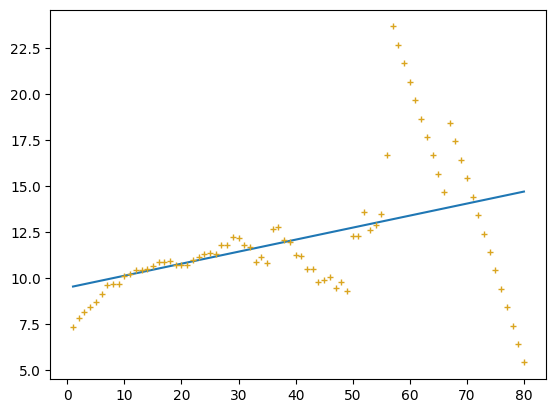

In [20]:
plt.plot(x, fit_eq)
plt.plot(x, E, "+", markeredgecolor="goldenrod", ms=5, label="quantiles empiriques s")
plt.show()

> **Remarque** : une régression linéaire sur le domaine en entier ne semble pas adaptée


In [21]:
s0 = 30  # seuil minimum
smax = 58  # seuil maximum

x2 = np.arange(s0, smax + 1)
p2 = np.polyfit(x2, E[s0 - 1 : smax], 1)

ang_coeff2 = p2[0]
intercept2 = p2[1]
fit_eq2 = ang_coeff2 * x2 + intercept2

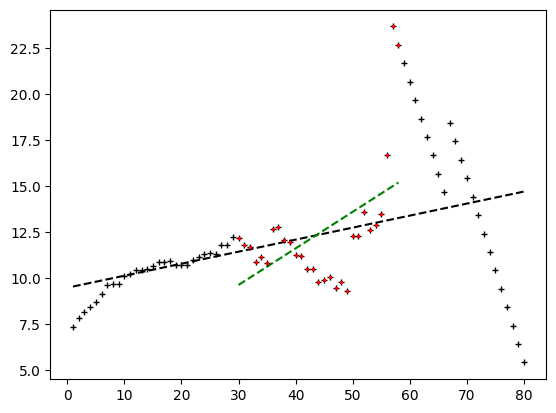

In [35]:
plt.plot(x, fit_eq, "--k")
plt.plot(x2, fit_eq2, "--g")
plt.plot(x, E, "+", markeredgecolor="black", ms=5, label="quantiles empiriques s")
plt.plot(x2, E[s0 - 1 : smax], "r*", ms=2)
plt.show()

Paramètres de la loi de Pareto (xi et sigma):

In [36]:
xi = p2[0] / (1 + p2[0])  # pente = xi/(1-xi)
sigma0 = p2[1] * (1 - xi) + xi * s0  # ordonnée à l'origine = (sigma0-xi*so)/(1-xi)

In [37]:
xi

0.1656386185674549

In [38]:
sigma0

8.045176734112959

3. Tracer le quantile $x_{p}(T)$ ainsi ajusté et comparer le aux données de l'échantillon.

$$si\,\,\, \tilde{\xi}\ne 0, x_p(T) = s+ \frac{\tilde{\sigma}}{\tilde{\xi}}\left(\left(T\frac{n_s}{n_a}\right)^{\tilde{\xi}}-1\right)$$

$$si\,\,\, \tilde{\xi} =0, x_p(T) = s+\tilde{\sigma}\mbox{ln}\left(T\frac{n_s}{n_a}\right) \tag{5}$$

**Solution:**  

In [39]:
s0 = 30  # seuil minimum

P0 = df[df["rain"] > s0]["rain"]  # pluie > s0 (échantillon)
ns = P0.count()  # nombre de valeurs dans l'échantillon
na = df["year"].nunique()
T = np.arange(start=0.1, stop=50, step=0.1)

S = s0 + sigma0 / xi * ((T * ns / na) ** xi - 1)

# temps de retour empirique [années]
Tempi = (
    na
    / ns
    * (
        1 / (1 - np.arange(1, ns + 1, 1) / (ns + 1))
    )  # na/ns permet de convertir T en années
)

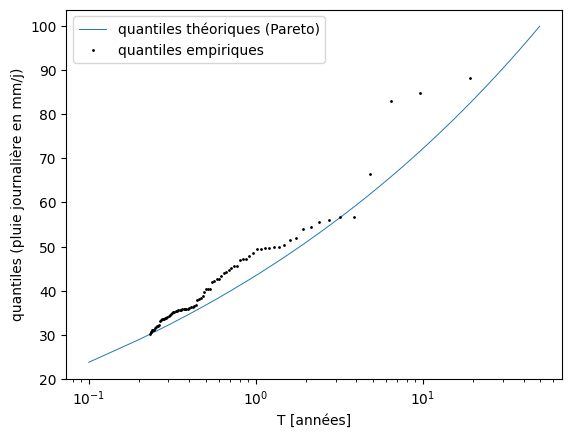

In [42]:
plt.semilogx(T, S, lw=0.7, label="quantiles théoriques (Pareto)")
plt.semilogx(Tempi, sorted(P0), "k.", ms=2, label="quantiles empiriques")
plt.legend()
plt.xlabel("T [années]")
plt.ylabel("quantiles (pluie journalière en mm/j)")
plt.show()

4. Ajuster maintenant les paramètres de la loi de Pareto grâce à la méthode d'optimisation de votre choix (max. de vraisemblance, Hasting-Metropolis, méthode des moments, etc.) pour 3 seuils différents  [`[stats.genpareto,`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genpareto.html#scipy.stats.genpareto)`fit()]`

> **Attention!** Les valeurs à ajuster selon cette loi sont les pluies $P_0$ qui sont supérieures au seuil moins la valeur du seuil $s_0$.

**Solution:**  

In [32]:
from scipy.stats import genpareto

seuil1 = 30
data1 = df[df["rain"] > seuil1]["rain"] - seuil1
pareto_params1 = genpareto.fit(data1)
ns1 = len(data1)

seuil2 = 40
data2 = df[df["rain"] > seuil2]["rain"] - seuil2
pareto_params2 = genpareto.fit(data2)
ns2 = len(data2)

seuil3 = 50
data3 = df[df["rain"] > seuil3]["rain"] - seuil3
pareto_params3 = genpareto.fit(data3)
ns3 = len(data3)

seuil4 = 60
data4 = df[df["rain"] > seuil4]["rain"] - seuil4
pareto_params4 = genpareto.fit(data4)
ns4 = len(data4)

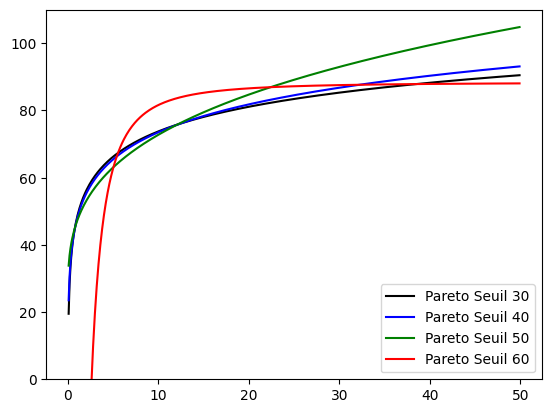

In [33]:
plt.plot(
    T,
    seuil1
    + pareto_params1[2] / pareto_params1[0] * ((T * ns1 / na) ** pareto_params1[0] - 1),
    "k-",
    label="Pareto Seuil 30",
)
plt.plot(
    T,
    seuil2
    + pareto_params2[2] / pareto_params2[0] * ((T * ns2 / na) ** pareto_params2[0] - 1),
    "b-",
    label="Pareto Seuil 40",
)
plt.plot(
    T,
    seuil3
    + pareto_params3[2] / pareto_params3[0] * ((T * ns3 / na) ** pareto_params3[0] - 1),
    "g-",
    label="Pareto Seuil 50",
)
plt.plot(
    T,
    seuil4
    + pareto_params4[2] / pareto_params4[0] * ((T * ns4 / na) ** pareto_params4[0] - 1),
    "r-",
    label="Pareto Seuil 60",
)
plt.legend()
plt.ylim((0, 110))
plt.show()

5. Reproduire ces résultats sur un même graphique et les comparer (quantiles théoriques, quantiles empiriques, quantiles théoriques avec la méthode d'optimisation).

**Solution:**  

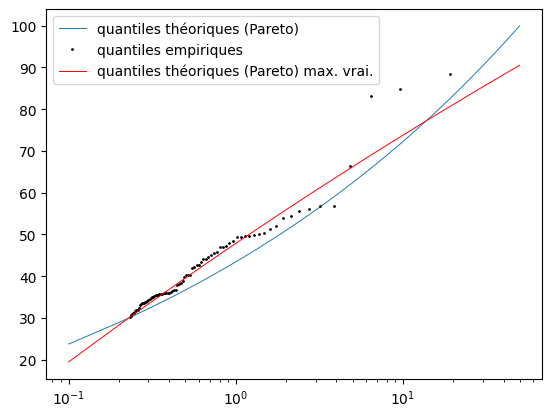

In [34]:
plt.semilogx(T, S, lw=0.7, label="quantiles théoriques (Pareto)")
plt.semilogx(Tempi, sorted(P0), "k.", ms=2, label="quantiles empiriques")
plt.semilogx(
    T,
    seuil1
    + pareto_params1[2] / pareto_params1[0] * ((T * ns / na) ** pareto_params1[0] - 1),
    "r-",
    label="quantiles théoriques (Pareto) max. vrai.",
    lw=0.7,
)

plt.legend()
plt.show()

> La méthode par régression linéaire de $E(X-s|X>s)$ donne une loi de Pareto comparable à une loi de type Fréchet $(xi>0)$ tandis que la méthode du maximum de vraismeblance a un comportement de type Gumbel $(xi = 0)$.

6. Donner la valeur du quantile extrapolé $C_{100}=$ 

> Use the parameters obtained with both the linear fit and distribution fit.

**Solution:**  

In [43]:
C100_par_reg = seuil1 + sigma0 / xi * ((100 * ns / na) ** xi - 1)  # 114.4 mm/j

C100_par_vraiss = seuil1 + pareto_params1[2] / pareto_params1[0] * (
    (100 * ns / na) ** pareto_params1[0] - 1
)  # 96.7 mm/j

In [44]:
C100_par_reg

114.3871019929565

In [45]:
C100_par_vraiss

97.40731032283365

---

## 3. Maximum de vraisemblance
1. Calculer les maxima annuels. `[df.groupby(), max()]`

**Solution:**  

In [46]:
df.describe()

,id,year,month,day,p1,p2,rain
count,6940.0,6940.000000,6940.000000,6940.000000,6940.0,6940.0,6940.000000
mean,28.0,1996.000000,6.522767,15.730115,0.0,0.0,2.933429
std,0.0,5.477752,3.448996,8.800928,0.0,0.0,6.643607
min,28.0,1987.000000,1.000000,1.000000,0.0,0.0,0.000000
25%,28.0,1991.000000,4.000000,8.000000,0.0,0.0,0.000000
50%,28.0,1996.000000,7.000000,16.000000,0.0,0.0,0.000000
75%,28.0,2001.000000,10.000000,23.000000,0.0,0.0,2.800000
max,28.0,2005.000000,12.000000,31.000000,0.0,0.0,88.300000


In [47]:
max_per_year = df.groupby("year").max()["rain"]
max_per_year

year
1987    40.3
1988    56.8
1989    30.2
1990    84.9
1991    88.3
1992    45.1
1993    36.4
1994    49.6
1995    49.4
1996    56.8
1997    35.6
1998    35.7
1999    52.0
2000    54.0
2001    83.1
2002    54.4
2003    66.4
2004    55.5
2005    49.7
Name: rain, dtype: float64

2. Ajuster une loi de valeurs extrêmes grâce au maximum de vraisemblance. [`[scipy.stats.genextreme,`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html)`fit(), cdf(),`[`statsmodels.distributions.empirical_distribution.ECDF]`](https://www.statsmodels.org/dev/generated/statsmodels.distributions.empirical_distribution.ECDF.html)

> Remember that:  $T=\dfrac{1}{1-genextreme.cdf(X)}$

**Solution:**  

We fit the general extreme value distribution.

In [51]:
from scipy.stats import genextreme

cgev, locgev, scalegev = genextreme.fit(max_per_year)
cgev, locgev, scalegev

(-0.021510227274590565, 46.29357416916355, 12.60915225381909)

We plot the Cumulative distribution function (CDF). 

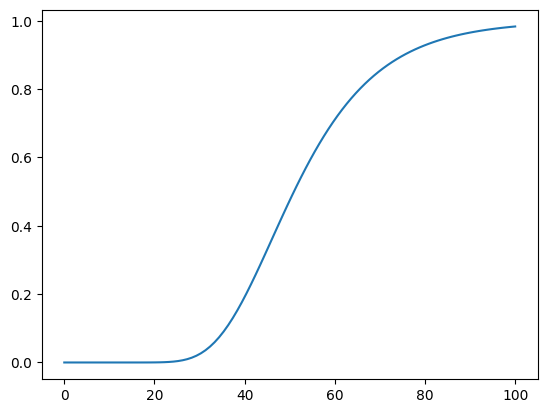

In [52]:
xFr = np.linspace(0, 100, 100)
Fr = genextreme.cdf(xFr, c=cgev, loc=locgev, scale=scalegev)
plt.plot(xFr, Fr)
plt.show()

We compute the Empirical Cumulative distribution function (ECDF)

In [53]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(max_per_year)

We plot both theoretical and empirical results.

/tmp/ipykernel_376/2616752932.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1 / (1 - ecdf.y), ecdf.x, ".b", label="Max. ann. empirique")


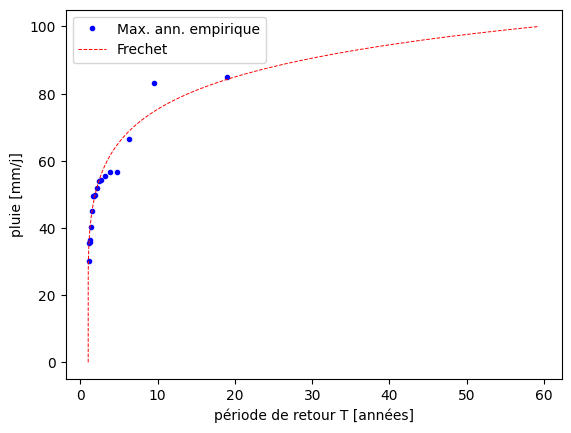

In [54]:
plt.plot(1 / (1 - ecdf.y), ecdf.x, ".b", label="Max. ann. empirique")
plt.plot(1 / (1 - Fr), xFr, "--r", lw=0.7, label="Frechet")
plt.xlabel("période de retour T [années]")
plt.ylabel("pluie [mm/j]")
plt.legend()
plt.show()

3. Tracer sur la même figure, le quantile obtenu $x_{ev}(T)$ via la méthode par bloc et les quantiles $x_{p}(T)$ et $C_s(T)$ obtenus via les méthodes à seuil. Conclure.

**Solution:**  

In [55]:
seuil = 45
Ps = df[df["rain"] > seuil]["rain"]  # pluie > seuil (échantillon)
Ps = Ps.sort_values()

In [56]:
Ms = Ps.mean()
ns = len(Ps)
I = np.arange(1, ns + 1, 1)
T = na / ns * (ns + 1) / (ns + 1 - I)
lda = ns / na
mu = 1 / (Ms - seuil)
C = seuil + np.log(lda) / mu + 1 / mu * np.log(I)

In [57]:
E = np.array([])
x = np.arange(1, 81)
for seuil in x:
    E = np.append(E, (df[df["rain"] > seuil]["rain"] - seuil).mean())


s0 = 30  # seuil minimum
smax = 58  # seuil maximum

x2 = np.arange(s0, smax + 1)
p2 = np.polyfit(x2, E[s0 - 1 : smax], 1)

ang_coeff2 = p2[0]
intercept2 = p2[1]
fit_eq2 = ang_coeff2 * x2 + intercept2

# paramètres de la loi de Pareto (xi et sigma)
xi = p2[0] / (1 + p2[0])  # pente = xi/(1-xi)
sigma0 = p2[1] * (1 - xi) + xi * s0  # ordonnée à l'origine = (sigma0-xi*so)/(1-xi)


P0 = df[df["rain"] > s0]["rain"]  # pluie > s0 (échantillon)
ns = P0.count()  # nombre de valeurs dans l'échantillon
na = df["year"].nunique()
T = np.arange(start=0.1, stop=50, step=0.1)

S = s0 + sigma0 / xi * ((T * ns / na) ** xi - 1)

Tempi = (
    na / ns * (1 / (1 - np.arange(1, ns + 1, 1) / (ns + 1)))
)  # temps de retour empirique [années]

/tmp/ipykernel_376/1242072552.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1 / (1 - ecdf.y), ecdf.x, ".b", label="Max. ann. empirique")


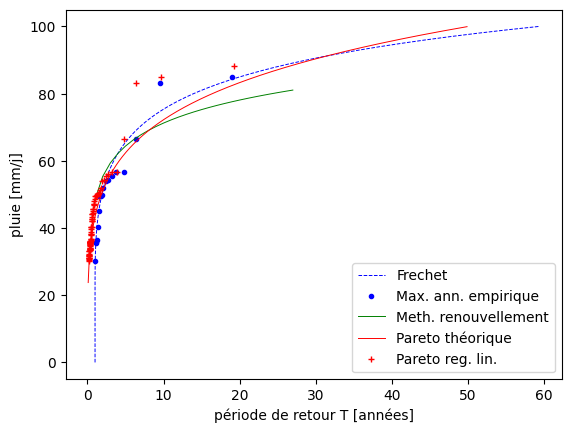

In [58]:
plt.plot(1 / (1 - Fr), xFr, "--b", lw=0.7, label="Frechet")
plt.plot(1 / (1 - ecdf.y), ecdf.x, ".b", label="Max. ann. empirique")
plt.plot(I, C, "g", lw=0.7, label="Meth. renouvellement")
plt.plot(T, S, "r", lw=0.7, label="Pareto théorique")
plt.plot(Tempi, sorted(P0), "+r", ms=4, label="Pareto reg. lin.")

plt.xlabel("période de retour T [années]")
plt.ylabel("pluie [mm/j]")
plt.legend()
plt.show()